In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df_line46A_clean = pd.read_csv('leavetimes_line46A_readyformodeling.csv')

In [3]:
df_line46A_clean.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,LINEID,DIRECTION,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,...,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-01-01 23:00:00,5970412,1,807,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
1,2018-01-01 23:00:00,5970412,2,808,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
2,2018-01-01 23:00:00,5970412,3,809,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
3,2018-01-01 23:00:00,5970412,6,812,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds
4,2018-01-01 23:00:00,5970412,7,813,46A,1,612,582,23.0,0,...,1008,75,7.2,260,NaN,NaN,NaN,40,Clouds,scattered clouds


In [4]:
df_line46A_clean.dtypes

DAYOFSERVICE            object
TRIPID                   int64
PROGRNUMBER              int64
STOPPOINTID              int64
LINEID                  object
DIRECTION                int64
PLANNED_TRIPTIME(s)      int64
ACTUAL_TRIPTIME(s)       int64
HOUROFDAY              float64
DAYOFWEEK                int64
MONTHOFYEAR              int64
ACC_TRAVELTIME(s)      float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
pressure                 int64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
dtype: object

In [5]:
df_line46A_clean['DAYOFSERVICE'] = df_line46A_clean['DAYOFSERVICE'].astype('datetime64')
df_line46A_clean['LINEID'] = df_line46A_clean['LINEID'].astype('category')
df_line46A_clean['weather_main'] = df_line46A_clean['weather_main'].astype('category')
df_line46A_clean['weather_description'] = df_line46A_clean['weather_description'].astype('category')
df_line46A_clean['TRIPID'] = df_line46A_clean['TRIPID'].astype('category')
df_line46A_clean.dtypes

DAYOFSERVICE           datetime64[ns]
TRIPID                       category
PROGRNUMBER                     int64
STOPPOINTID                     int64
LINEID                       category
DIRECTION                       int64
PLANNED_TRIPTIME(s)             int64
ACTUAL_TRIPTIME(s)              int64
HOUROFDAY                     float64
DAYOFWEEK                       int64
MONTHOFYEAR                     int64
ACC_TRAVELTIME(s)             float64
temp                          float64
visibility                    float64
dew_point                     float64
feels_like                    float64
pressure                        int64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
wind_gust                     float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                 category
weather_description          category
dtype: objec

In [6]:
df_line46A_clean.isna().sum()

DAYOFSERVICE                 0
TRIPID                       0
PROGRNUMBER                  0
STOPPOINTID                  0
LINEID                       0
DIRECTION                    0
PLANNED_TRIPTIME(s)          0
ACTUAL_TRIPTIME(s)           0
HOUROFDAY                    0
DAYOFWEEK                    0
MONTHOFYEAR                  0
ACC_TRAVELTIME(s)            0
temp                         0
visibility               14239
dew_point                    0
feels_like                   0
pressure                     0
humidity                     0
wind_speed                   0
wind_deg                     0
wind_gust              4038865
rain_1h                3563121
snow_1h                4471024
clouds_all                   0
weather_main                 0
weather_description          0
dtype: int64

In [7]:
#Fill in the blank with 0.
df_line46A_clean['visibility'].fillna(0, inplace=True)
df_line46A_clean['wind_gust'].fillna(0, inplace=True)
df_line46A_clean['rain_1h'].fillna(0, inplace=True)
df_line46A_clean['snow_1h'].fillna(0, inplace=True)

In [8]:
# randomly generate sequence based on dataframe index and set to be new index
df_line46A_clean.set_index(np.random.permutation(df_line46A_clean.index))
# sort the resulting random index
df_line46A_clean.sort_index(inplace=True)
df_line46A_clean.head(5)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,LINEID,DIRECTION,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,...,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-01-01 23:00:00,5970412,1,807,46A,1,612,582,23.0,0,...,1008,75,7.2,260,0.0,0.0,0.0,40,Clouds,scattered clouds
1,2018-01-01 23:00:00,5970412,2,808,46A,1,612,582,23.0,0,...,1008,75,7.2,260,0.0,0.0,0.0,40,Clouds,scattered clouds
2,2018-01-01 23:00:00,5970412,3,809,46A,1,612,582,23.0,0,...,1008,75,7.2,260,0.0,0.0,0.0,40,Clouds,scattered clouds
3,2018-01-01 23:00:00,5970412,6,812,46A,1,612,582,23.0,0,...,1008,75,7.2,260,0.0,0.0,0.0,40,Clouds,scattered clouds
4,2018-01-01 23:00:00,5970412,7,813,46A,1,612,582,23.0,0,...,1008,75,7.2,260,0.0,0.0,0.0,40,Clouds,scattered clouds


In [9]:
y = pd.DataFrame(df_line46A_clean["ACC_TRAVELTIME(s)"])
X = df_line46A_clean.loc[:, df_line46A_clean.columns != "ACC_TRAVELTIME(s)"]

In [10]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

print("original range is: ",df_line46A_clean.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  4485083
training range (70%):	 rows 0 to 3139558
test range (30%): 	 rows 3139558 to 4485083


#### Plot the correlations between all the continuous features.

In [11]:
#We will set up category and continuous columns
categorical_columns = X.select_dtypes(include=['category']).columns.tolist()
categorical_columns

continuous_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()
continuous_columns

['PROGRNUMBER',
 'STOPPOINTID',
 'DIRECTION',
 'PLANNED_TRIPTIME(s)',
 'ACTUAL_TRIPTIME(s)',
 'HOUROFDAY',
 'DAYOFWEEK',
 'MONTHOFYEAR',
 'temp',
 'visibility',
 'dew_point',
 'feels_like',
 'pressure',
 'humidity',
 'wind_speed',
 'wind_deg',
 'wind_gust',
 'rain_1h',
 'snow_1h',
 'clouds_all']

<ipython-input-12-ac022f98e533>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


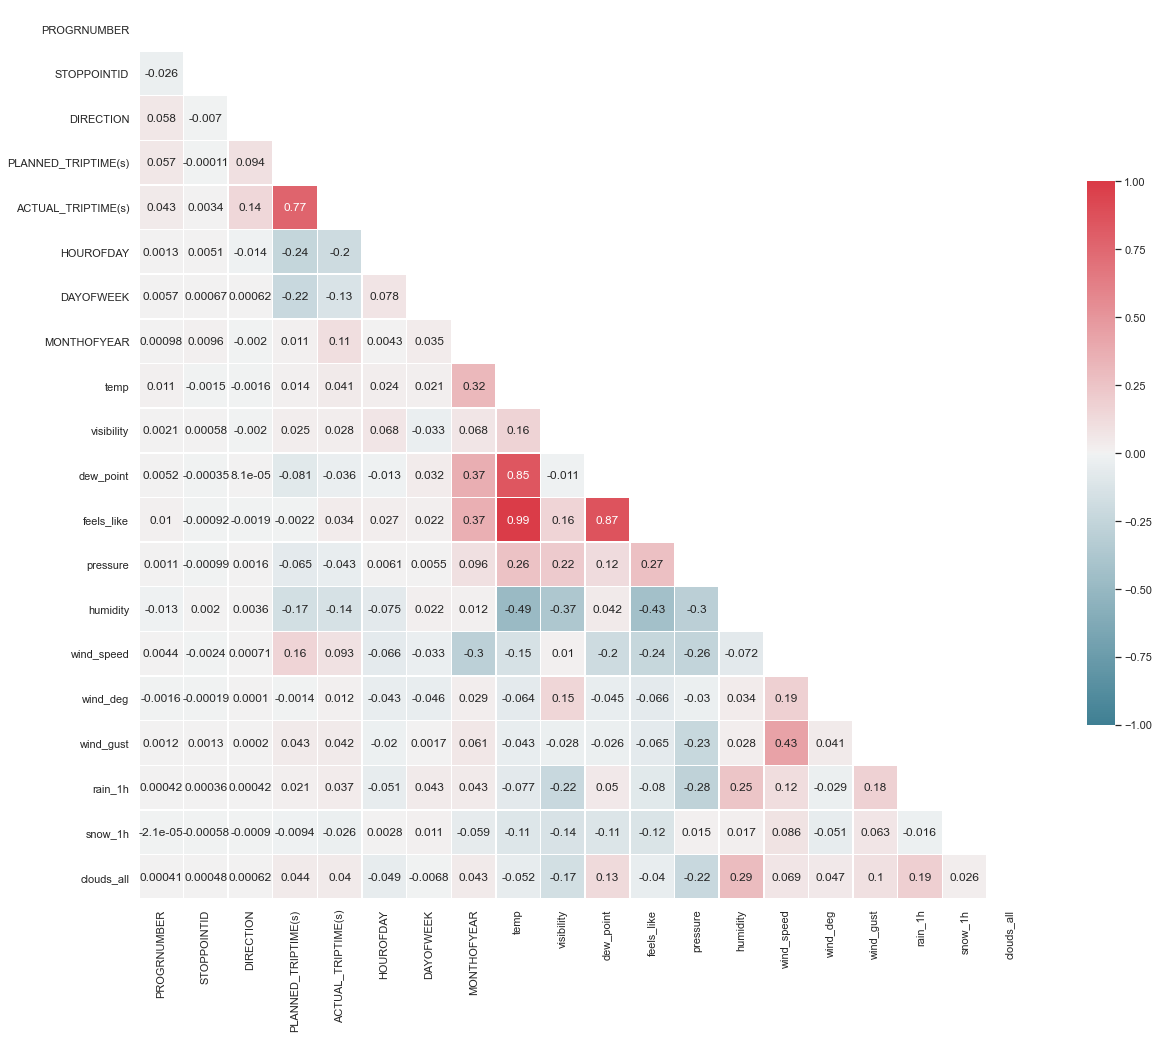

In [12]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = X_train[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

plt.savefig('continuous_features_correlations.pdf')

### Plot interaction between continuous features and target feature

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

,ACC_TRAVELTIME(s)
PROGRNUMBER,0.911799
ACTUAL_TRIPTIME(s),0.262847
PLANNED_TRIPTIME(s),0.231684
wind_speed,0.032148
temp,0.019440
MONTHOFYEAR,0.018051
feels_like,0.016005
rain_1h,0.012695
wind_gust,0.009917
clouds_all,0.009206


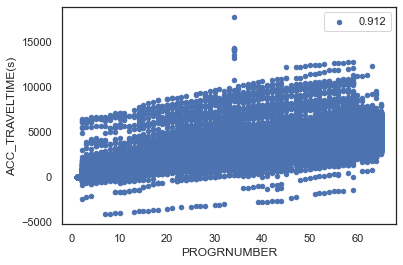

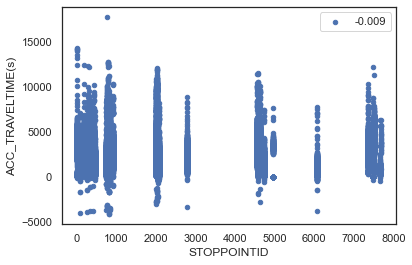

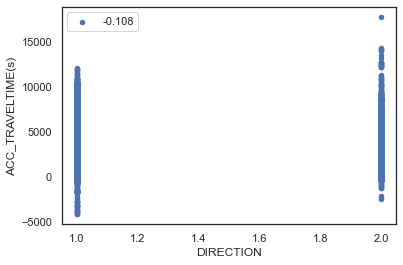

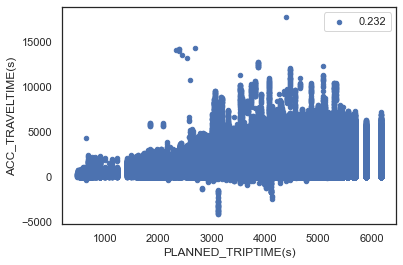

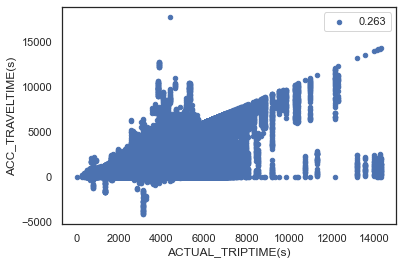

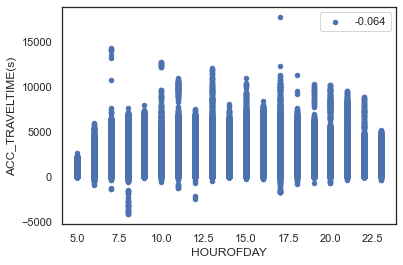

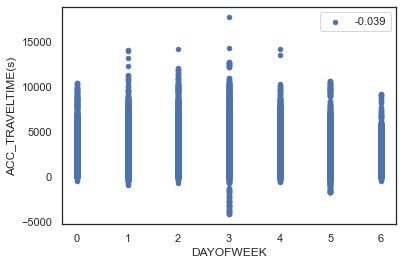

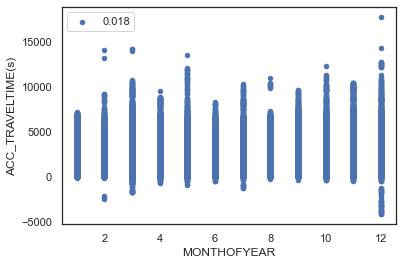

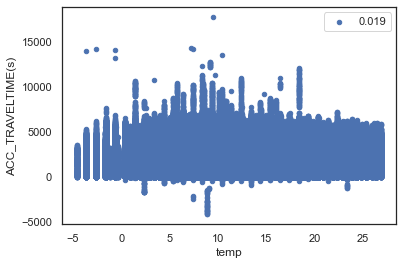

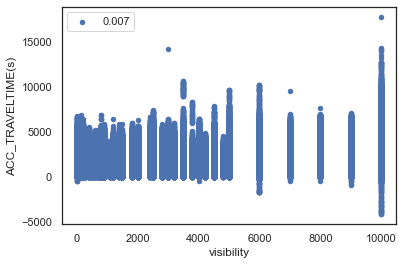

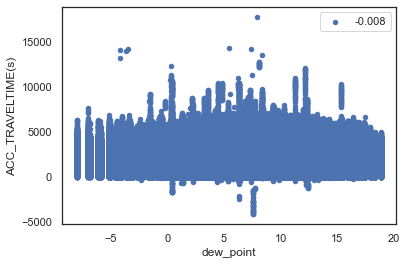

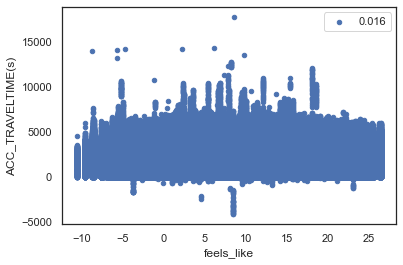

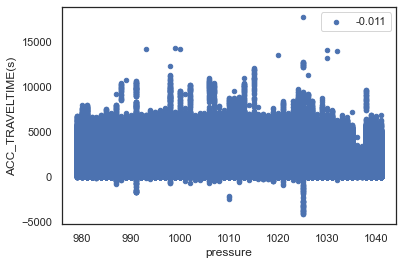

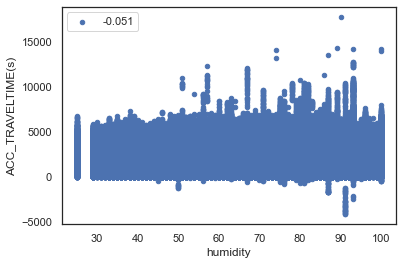

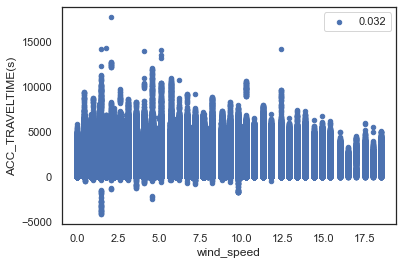

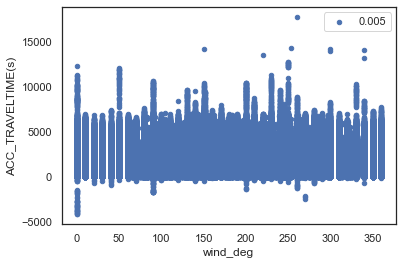

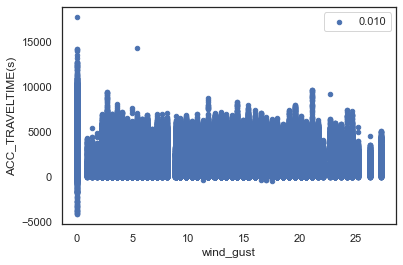

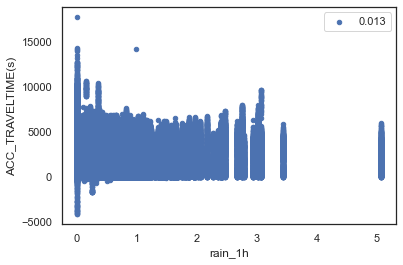

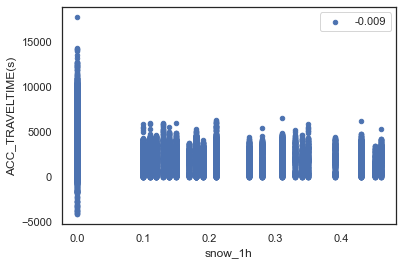

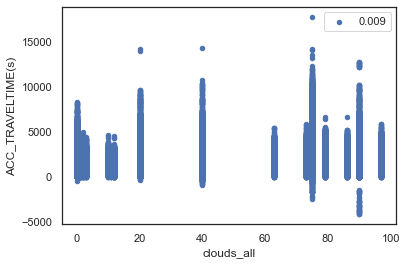

In [13]:
# dict to hold correlation values 
corr_dict = {}

# plot pairwise interaction between all continuous features and target
for column in X_train[continuous_columns]:
    # create temp df to merge column and target
    df_temp = pd.concat([X_train[column], y_train], axis=1)
    # store correlation in variable
    correlation = df_temp[[column, "ACC_TRAVELTIME(s)"]].corr().values[0,1]
    # plot the column and tartget feature
    df_temp.plot(kind='scatter', x=column, y="ACC_TRAVELTIME(s)", label="%.3f" % correlation)
    # add correlation to dict
    corr_dict[column] = correlation

# dataframe holding sorted correlation values to aid in interpreting results
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['ACC_TRAVELTIME(s)']).sort_values('ACC_TRAVELTIME(s)', ascending=False)
corr_df

### Plot interaction between categorical features and target feature.

In [14]:
# we will create temp dataframe for these plots, mergeing X_train and y_train
y_train = y_train.astype("category")
df_temp= pd.concat([X_train, y_train], axis=1)
df_temp.dtypes

DAYOFSERVICE           datetime64[ns]
TRIPID                       category
PROGRNUMBER                     int64
STOPPOINTID                     int64
LINEID                       category
DIRECTION                       int64
PLANNED_TRIPTIME(s)             int64
ACTUAL_TRIPTIME(s)              int64
HOUROFDAY                     float64
DAYOFWEEK                       int64
MONTHOFYEAR                     int64
temp                          float64
visibility                    float64
dew_point                     float64
feels_like                    float64
pressure                        int64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
wind_gust                     float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                 category
weather_description          category
ACC_TRAVELTIME(s)            category
dtype: objec

<AxesSubplot:title={'center':'ACC_TRAVELTIME(s)'}, xlabel='[LINEID]'>

<Figure size 432x288 with 0 Axes>

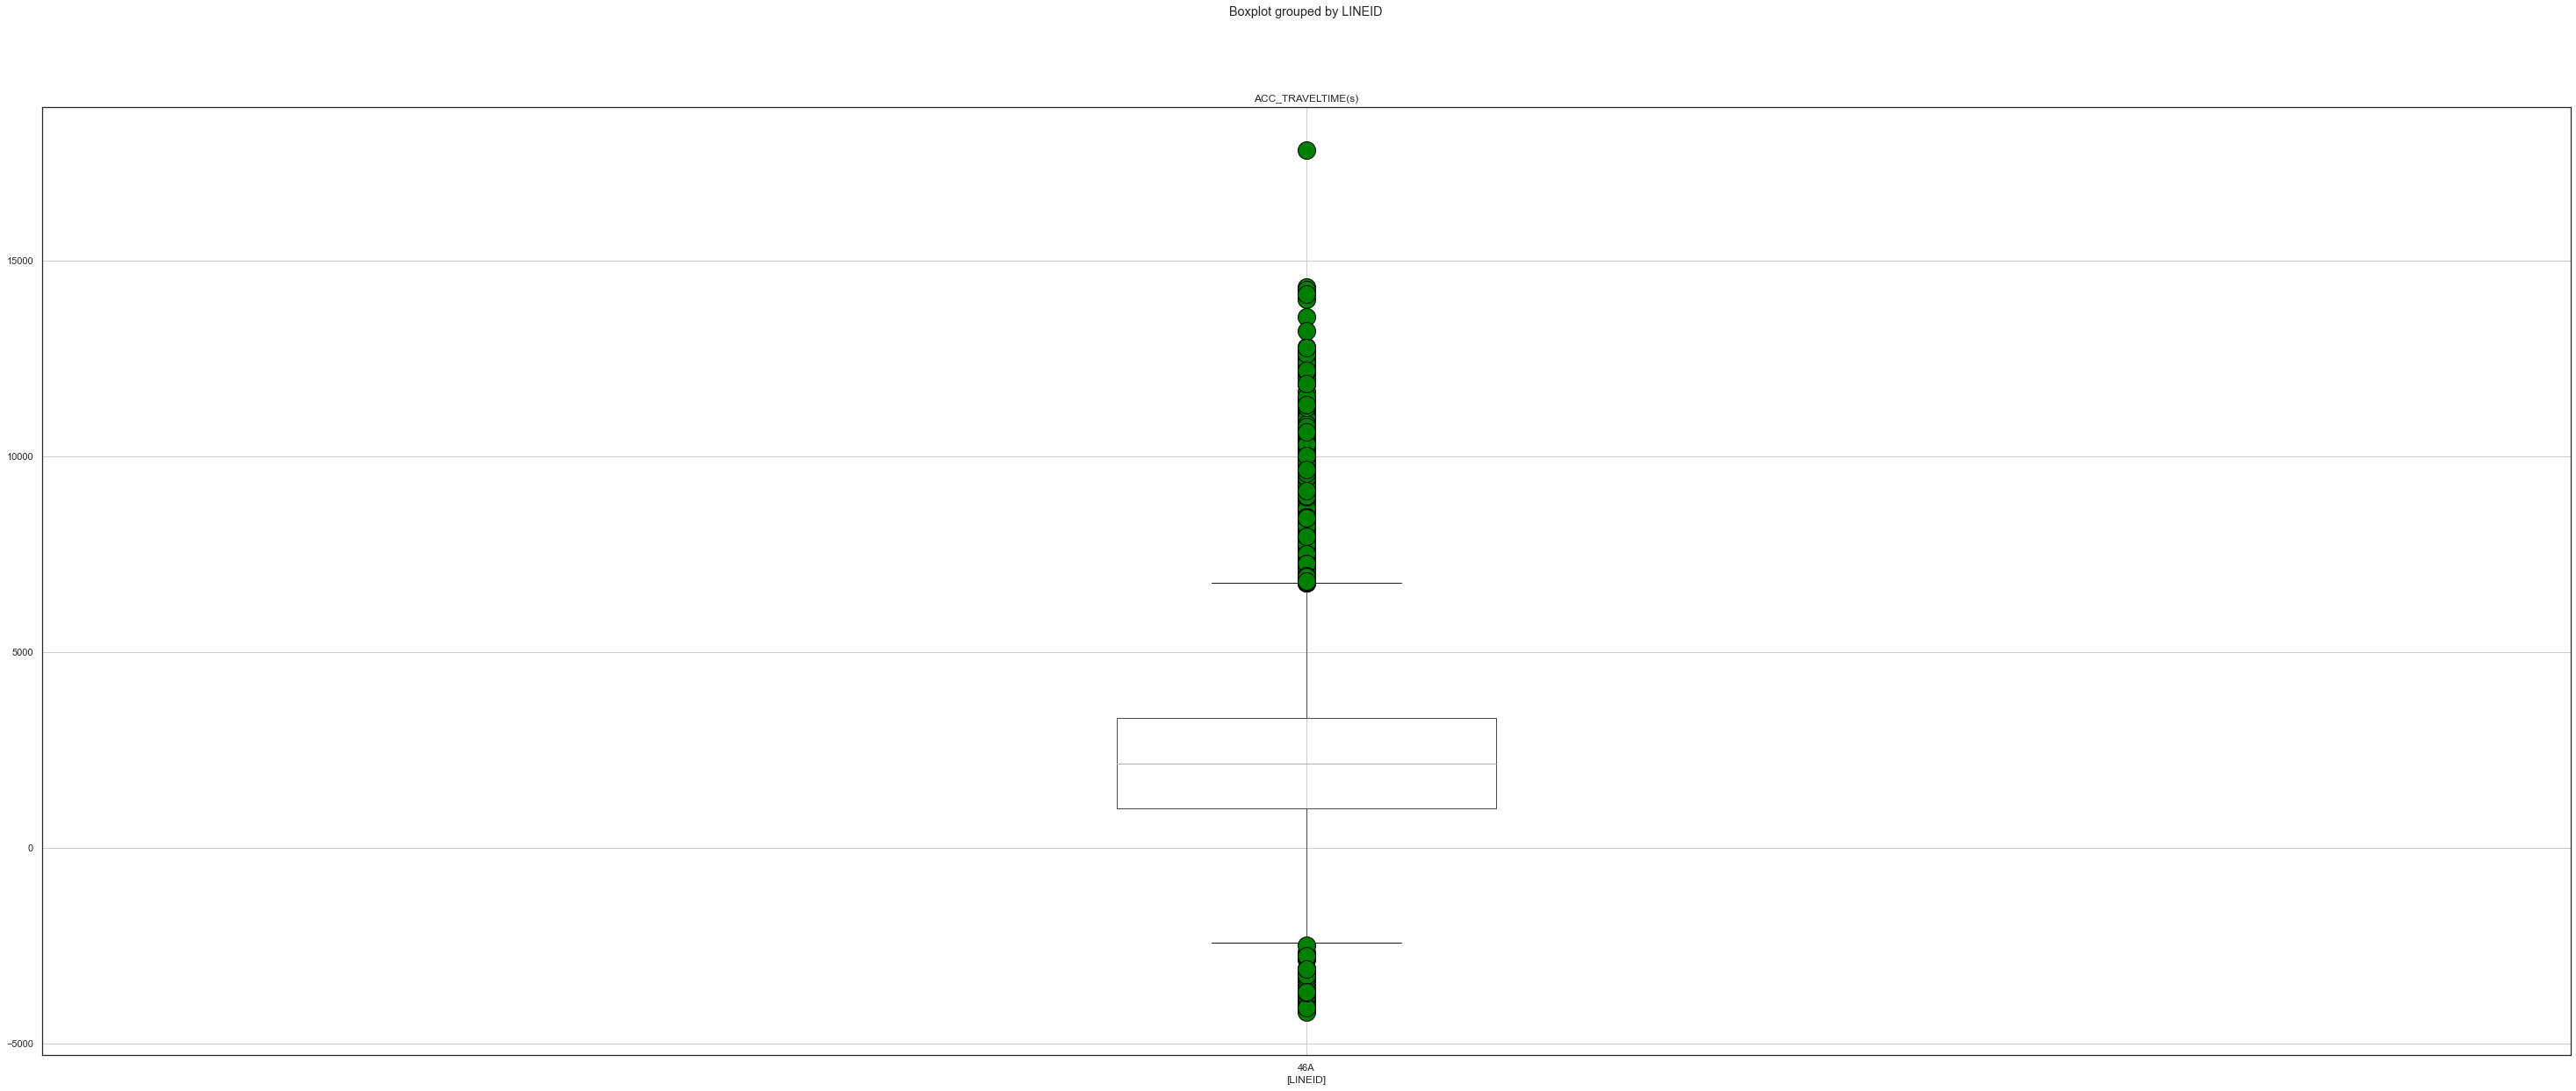

In [15]:
# LINEID vs ACC_TRAVELTIME(s)
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=20, 
                  linestyle='none')
df_temp.boxplot(column=['ACC_TRAVELTIME(s)'], by=['LINEID'], flierprops=flierprops, figsize=(50,20))


<AxesSubplot:title={'center':'ACC_TRAVELTIME(s)'}, xlabel='[weather_main]'>

<Figure size 432x288 with 0 Axes>

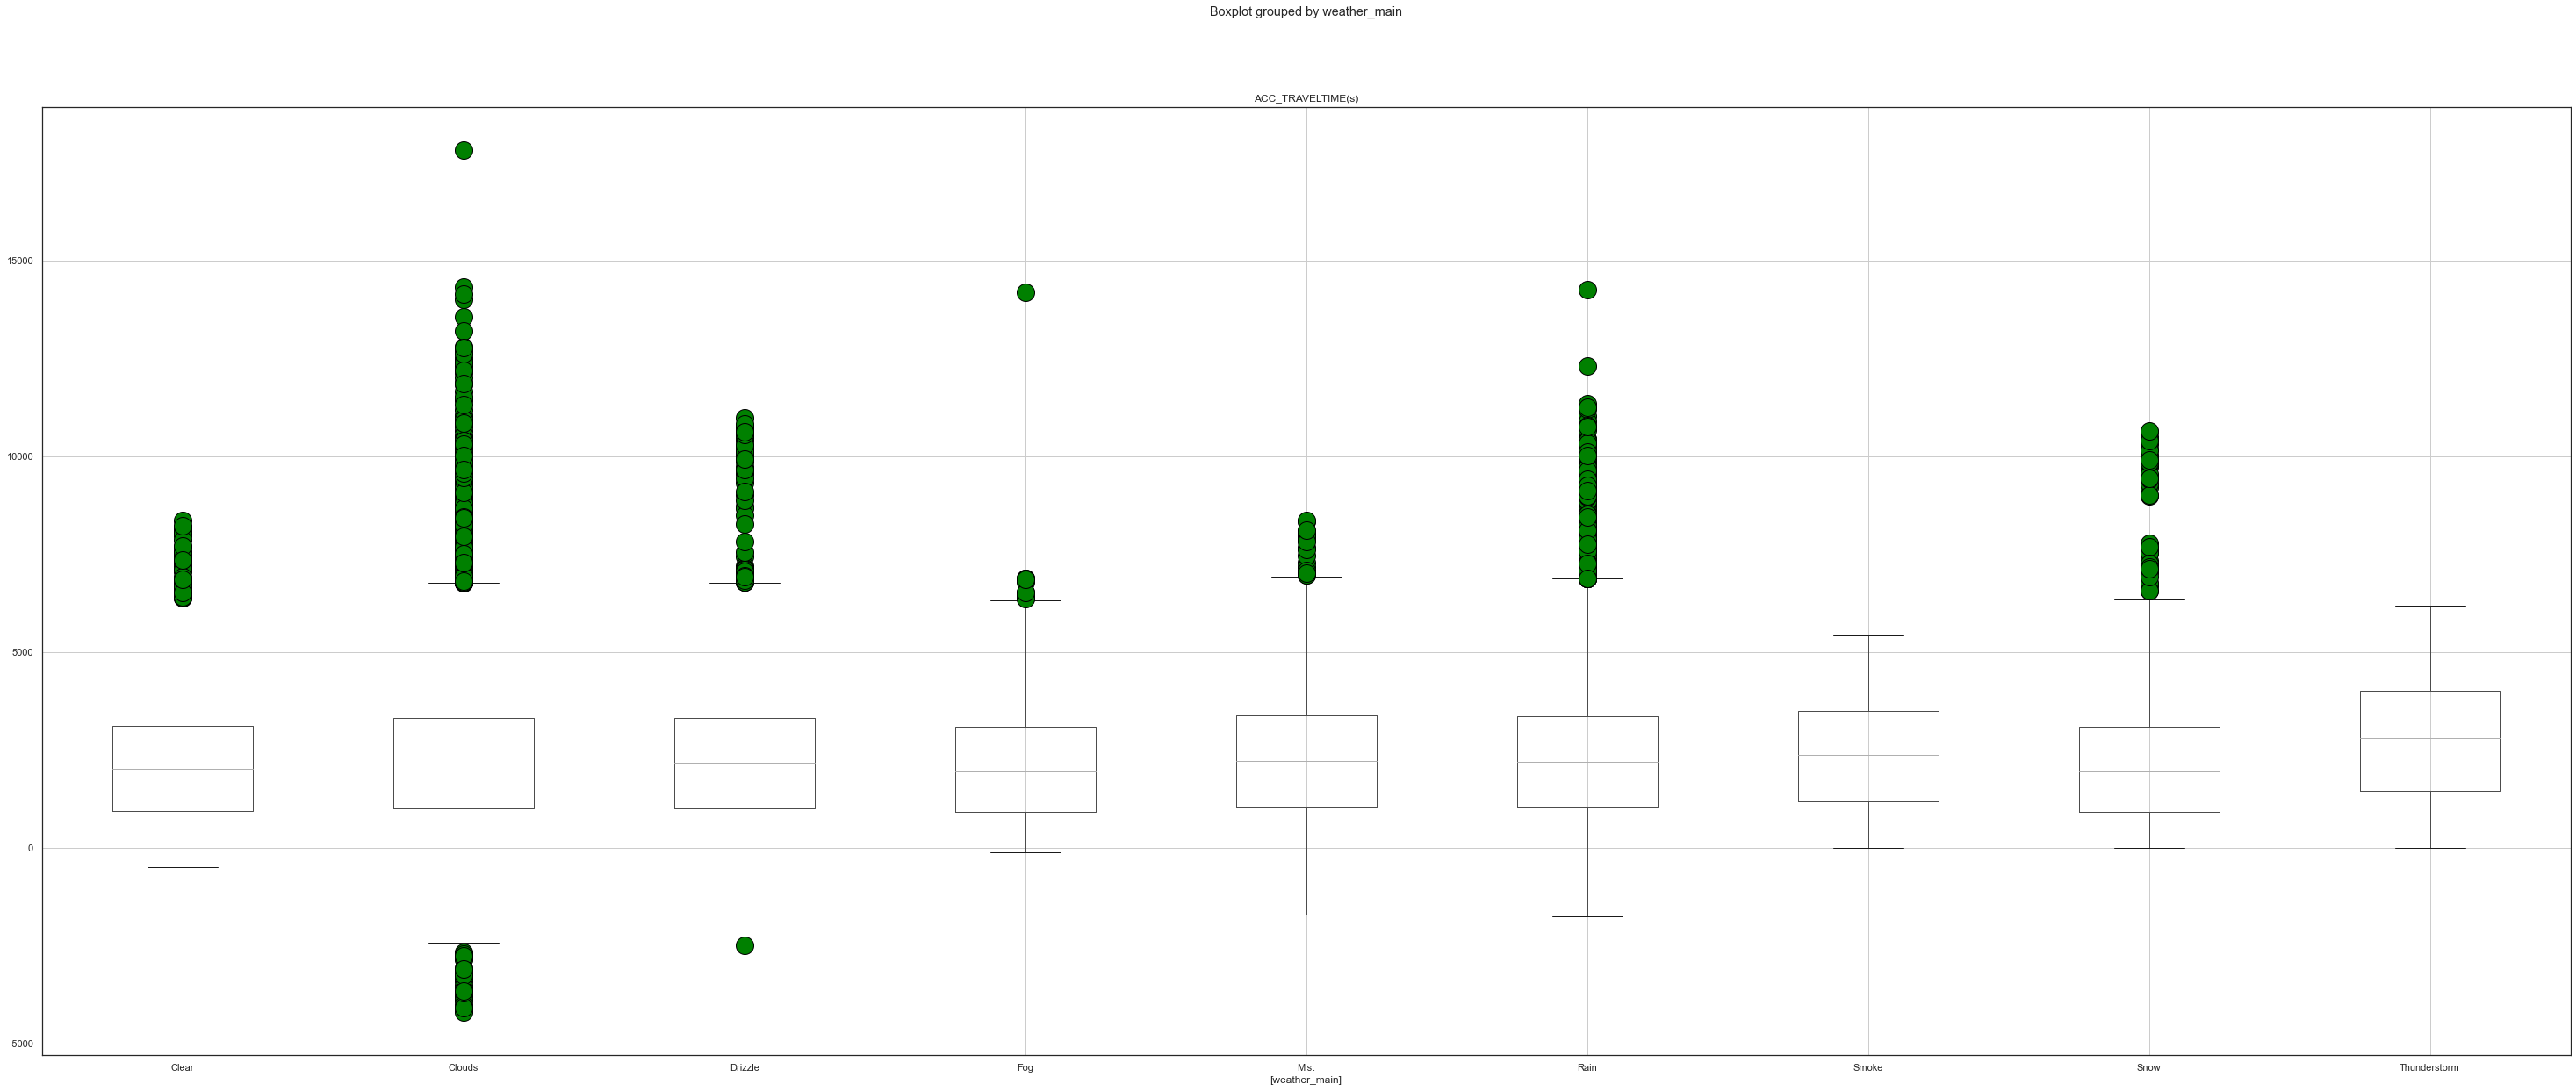

In [16]:
# weather_main vs ACC_TRAVELTIME(s)
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=20, 
                  linestyle='none')
df_temp.boxplot(column=['ACC_TRAVELTIME(s)'], by=['weather_main'], flierprops=flierprops, figsize=(50,20))


<AxesSubplot:title={'center':'ACC_TRAVELTIME(s)'}, xlabel='[weather_description]'>

<Figure size 432x288 with 0 Axes>

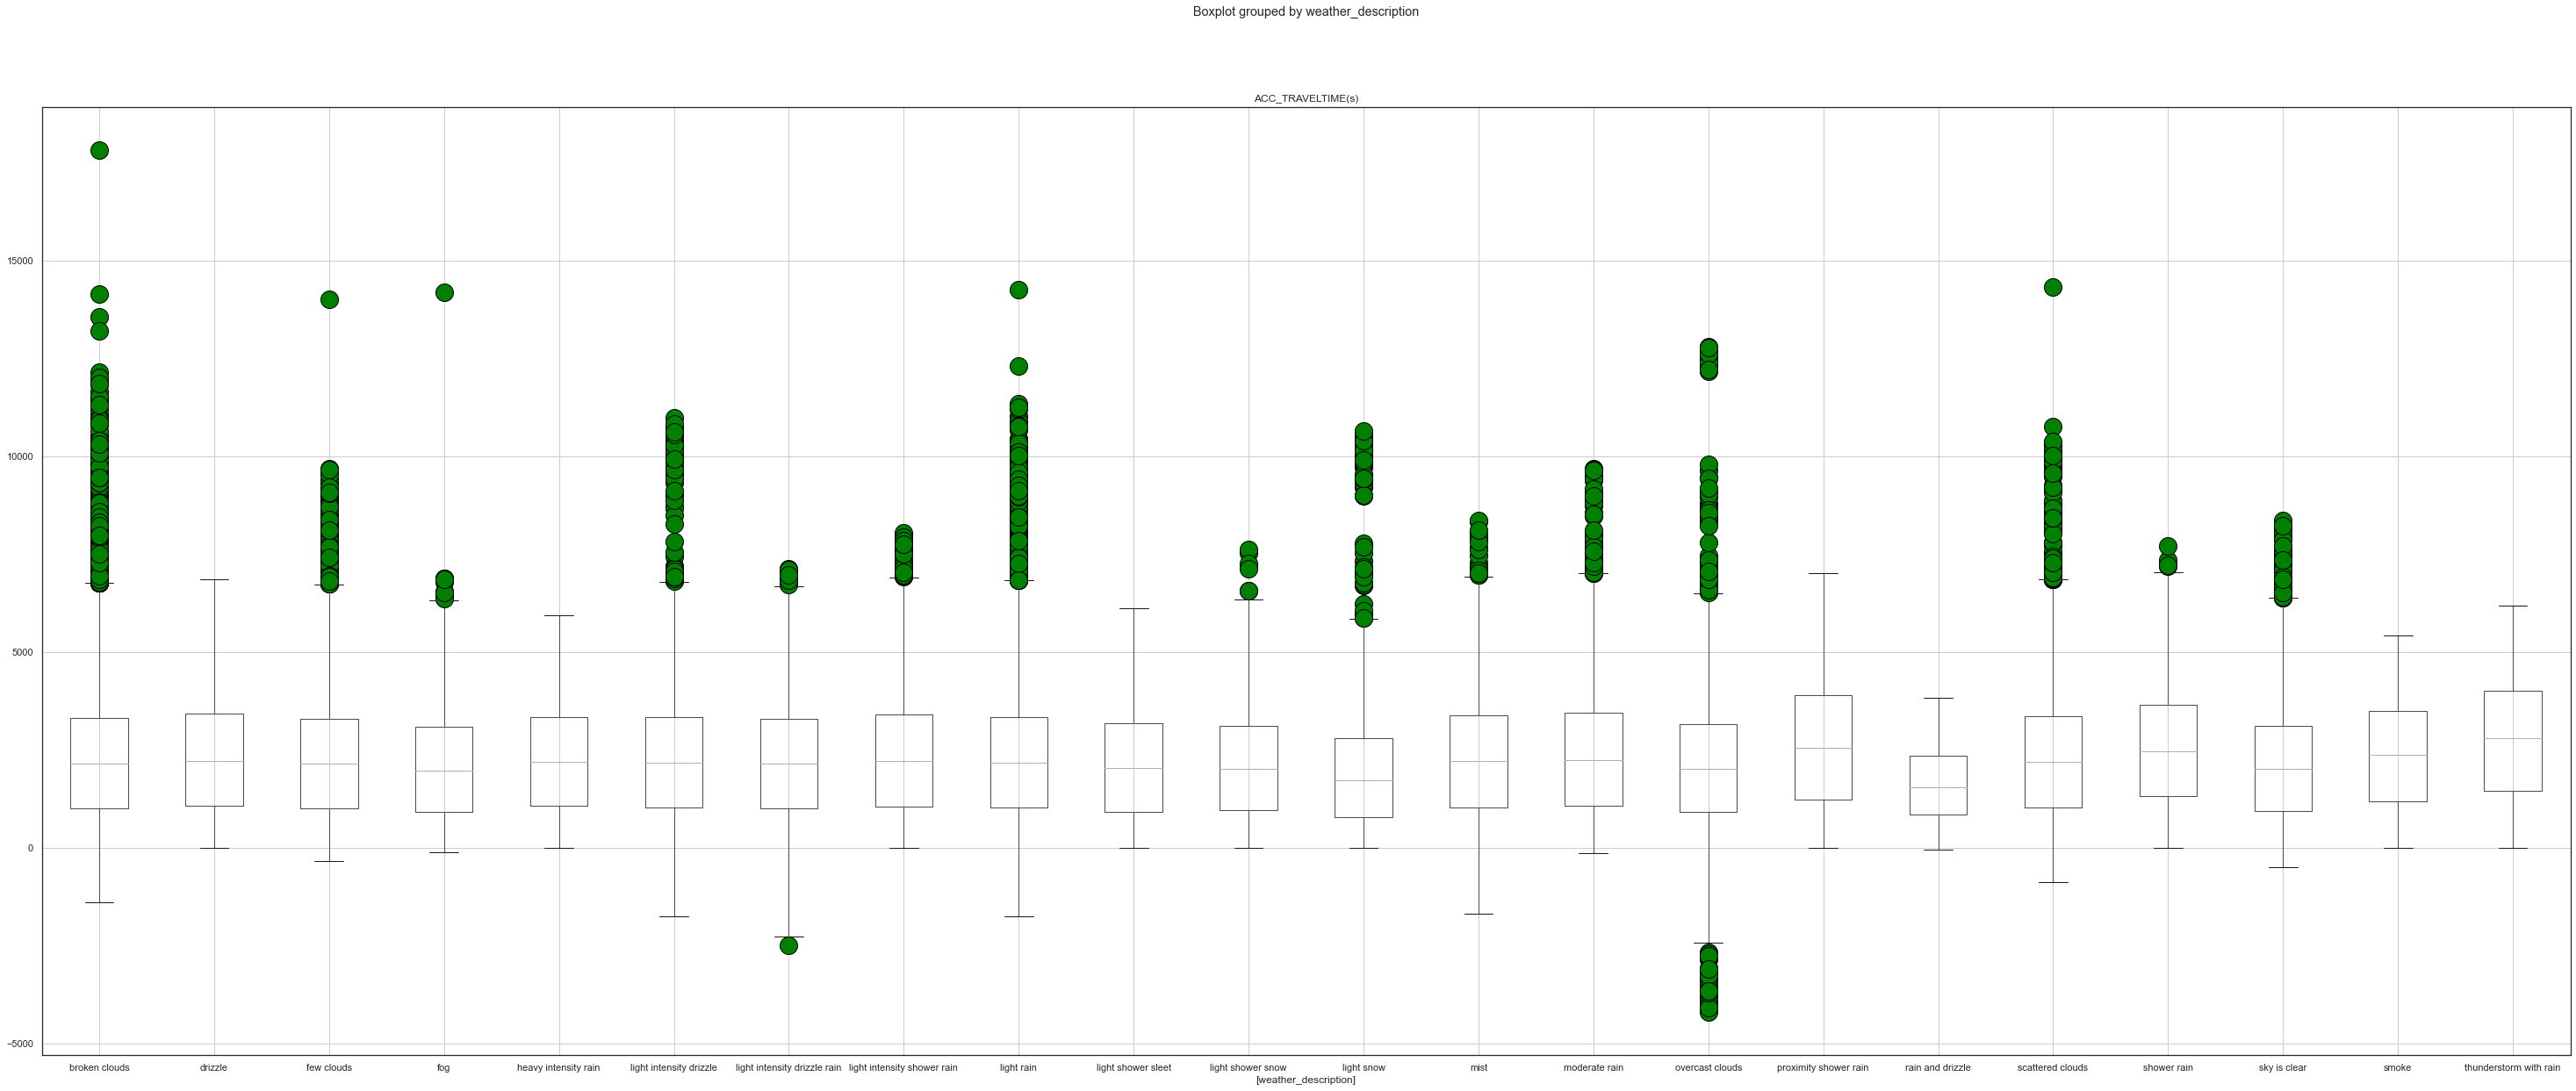

In [21]:
# weather_description vs ACC_TRAVELTIME(s)
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=20, 
                  linestyle='none')
df_temp.boxplot(column=['ACC_TRAVELTIME(s)'], by=['weather_description'], flierprops=flierprops, figsize=(50,20))

### Linear Regression Model

In [25]:
#Select the features we need for modeling and Copy the original version of dataset
df_line46A_ver1 = df_line46A_clean[['LINEID','DIRECTION','PROGRNUMBER','STOPPOINTID','PLANNED_TRIPTIME(s)','HOUROFDAY','DAYOFWEEK','MONTHOFYEAR','ACC_TRAVELTIME(s)','temp','wind_speed','rain_1h','wind_gust','weather_description']]
df_line46A_ver1

,LINEID,DIRECTION,PROGRNUMBER,STOPPOINTID,PLANNED_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR,ACC_TRAVELTIME(s),temp,wind_speed,rain_1h,wind_gust,weather_description
0,46A,1,1,807,612,23.0,0,1,0.0,4.39,7.20,0.0,0.00,scattered clouds
1,46A,1,2,808,612,23.0,0,1,175.0,4.39,7.20,0.0,0.00,scattered clouds
2,46A,1,3,809,612,23.0,0,1,189.0,4.39,7.20,0.0,0.00,scattered clouds
3,46A,1,6,812,612,23.0,0,1,234.0,4.39,7.20,0.0,0.00,scattered clouds
4,46A,1,7,813,612,23.0,0,1,249.0,4.39,7.20,0.0,0.00,scattered clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485078,46A,2,56,799,2728,21.0,6,12,3126.0,10.53,0.45,0.0,2.24,light intensity drizzle
4485079,46A,2,55,798,2728,21.0,6,12,3091.0,10.53,0.45,0.0,2.24,light intensity drizzle
4485080,46A,2,30,768,2728,21.0,6,12,1456.0,10.53,0.45,0.0,2.24,light intensity drizzle
4485081,46A,2,39,777,2728,21.0,6,12,1773.0,10.53,0.45,0.0,2.24,light intensity drizzle


In [26]:
df_line46A_ver1.isna().sum()

LINEID                 0
DIRECTION              0
PROGRNUMBER            0
STOPPOINTID            0
PLANNED_TRIPTIME(s)    0
HOUROFDAY              0
DAYOFWEEK              0
MONTHOFYEAR            0
ACC_TRAVELTIME(s)      0
temp                   0
wind_speed             0
rain_1h                0
wind_gust              0
weather_description    0
dtype: int64

In [27]:
# set up dummies features
df_line46A_ver1 = pd.get_dummies(df_line46A_ver1, drop_first=True)
df_line46A_ver1.dtypes

DIRECTION                                             int64
PROGRNUMBER                                           int64
STOPPOINTID                                           int64
PLANNED_TRIPTIME(s)                                   int64
HOUROFDAY                                           float64
DAYOFWEEK                                             int64
MONTHOFYEAR                                           int64
ACC_TRAVELTIME(s)                                   float64
temp                                                float64
wind_speed                                          float64
rain_1h                                             float64
wind_gust                                           float64
weather_description_drizzle                           uint8
weather_description_few clouds                        uint8
weather_description_fog                               uint8
weather_description_heavy intensity rain              uint8
weather_description_light intensity driz

In [28]:
#Setting up the train/test split

# y is the target
y = df_line46A_ver1["ACC_TRAVELTIME(s)"]
# X is everything else
X = df_line46A_ver1.drop(["ACC_TRAVELTIME(s)"],1)
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_line46A_ver1.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  4485083
training range (70%):	 rows 0 to 3139558
test range (30%): 	 rows 3139558 to 4485083


In [29]:
# Train aka fit, a model using all continuous and categorical features.
multiple_linreg = LinearRegression().fit(X_train, y_train)

In [30]:
# calculate the prediction
multiple_linreg_predictions_train = multiple_linreg.predict(X_train)

In [34]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
        

In [32]:
printMetrics(y_train, multiple_linreg_predictions_train)


MAE:  340.2370308628122
RMSE:  458.01100121082817
R2:  0.8966391679980028


In [33]:
linreg_predictions = multiple_linreg.predict(X_test)

print("\nPredictions with linear regression: \n")
actual_vs_predicted_linreg = pd.concat([y_test, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y_test.index)], axis=1)
print(actual_vs_predicted_linreg)


Predictions with linear regression: 

         ACC_TRAVELTIME(s)    Predicted
260877              2002.0  2065.089704
1470531             2520.0  2153.013792
1304832             3192.0  3371.191614
4081891             3070.0  2800.703914
4441838             4186.0  4040.899302
...                    ...          ...
1952728             2091.0  2027.277821
3358872             1870.0  1844.804170
1920166             2057.0  2937.239266
439509              1779.0  1372.161579
577267               339.0   702.412885

[1345525 rows x 2 columns]


In [34]:
printMetrics(y_test, linreg_predictions)


MAE:  340.57497827080624
RMSE:  456.50970280188847
R2:  0.897475585007218


In [35]:
def linreg_cross_validation(X_set,y_set,k):
    
    linreg_Results = {}
    
    print("=======================MAE===========================")
    MAE_scores = -cross_val_score(LinearRegression(), X_set,y_set, scoring='neg_mean_absolute_error', cv=k)
    print(MAE_scores)
    print("Avg MAE score over 10 folds:", np.mean(MAE_scores))
    print("Stddev MAE score over 10 folds:", np.std(MAE_scores))
    linreg_Results['MAE'] = np.mean(MAE_scores)
    
    print("\n=====================RMSE==========================")
    RMSE_scores = -cross_val_score(LinearRegression(), X_set,y_set, scoring='neg_mean_squared_error', cv=k)
    print(RMSE_scores)
    rmse = RMSE_scores**0.5
    print("Avg RMSE score over 10 folds:", np.mean(rmse))
    print("Stddev RMSE score over 10 folds:", np.std(rmse))
    linreg_Results['RMSE'] = np.mean(rmse)
    
    print("\n======================R2===========================")
    R2_scores = cross_val_score(LinearRegression(), X_set,y_set, scoring='r2', cv=k)
    print(R2_scores)
    print("Avg R2 score over 10 folds:", np.mean(R2_scores))
    print("Stddev R2 score over 10 folds:", np.std(R2_scores))
    linreg_Results['R2'] = np.mean(R2_scores)
    
    linreg_DF = pd.DataFrame.from_dict(linreg_Results, orient = 'index', columns=['Linear_Regression'])
    return linreg_DF
    

In [36]:
linreg_cross_validation(X_train,y_train,10)

=======================MAE===========================
[339.64973755 340.08513811 340.82492338 340.192016   340.36920724
 340.80889164 340.24383438 339.65663785 340.63972979 339.9487936 ]
Avg MAE score over 10 folds: 340.2418909534411
Stddev MAE score over 10 folds: 0.40522060821112765

=====================RMSE==========================
[210116.44989661 208444.00591024 210385.05597252 209387.51604087
 210118.81441417 209937.0714334  209389.12946416 207952.44666519
 212256.30216902 209815.42651311]
Avg RMSE score over 10 folds: 458.0161261279044
Stddev RMSE score over 10 folds: 1.204182177486693

======================R2===========================
[0.8968256  0.89705552 0.89644124 0.8965433  0.8965147  0.89669558
 0.89678028 0.8974883  0.8953539  0.8966596 ]
Avg R2 score over 10 folds: 0.8966358011619553
Stddev R2 score over 10 folds: 0.0005165565480836289


,Linear_Regression
MAE,340.241891
RMSE,458.016126
R2,0.896636


### Random Forest Model

In [37]:
#Delete the values in ACC_TRAVELTIME(s) which <= 0
index_prog0 = df_line46A_ver1[df_line46A_ver1['ACC_TRAVELTIME(s)'] <= 0].index
df_line46A_ver2 = df_line46A_ver1.drop(index = index_prog0)
df_line46A_ver2

,DIRECTION,PROGRNUMBER,STOPPOINTID,PLANNED_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR,ACC_TRAVELTIME(s),temp,wind_speed,...,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_rain and drizzle,weather_description_scattered clouds,weather_description_shower rain,weather_description_sky is clear,weather_description_smoke,weather_description_thunderstorm with rain
1,1,2,808,612,23.0,0,1,175.0,4.39,7.20,...,0,0,0,0,0,1,0,0,0,0
2,1,3,809,612,23.0,0,1,189.0,4.39,7.20,...,0,0,0,0,0,1,0,0,0,0
3,1,6,812,612,23.0,0,1,234.0,4.39,7.20,...,0,0,0,0,0,1,0,0,0,0
4,1,7,813,612,23.0,0,1,249.0,4.39,7.20,...,0,0,0,0,0,1,0,0,0,0
5,1,9,81,612,23.0,0,1,316.0,4.39,7.20,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485078,2,56,799,2728,21.0,6,12,3126.0,10.53,0.45,...,0,0,0,0,0,0,0,0,0,0
4485079,2,55,798,2728,21.0,6,12,3091.0,10.53,0.45,...,0,0,0,0,0,0,0,0,0,0
4485080,2,30,768,2728,21.0,6,12,1456.0,10.53,0.45,...,0,0,0,0,0,0,0,0,0,0
4485081,2,39,777,2728,21.0,6,12,1773.0,10.53,0.45,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_line46A_ver2[df_line46A_ver2['ACC_TRAVELTIME(s)'] <= 0]

,DIRECTION,PROGRNUMBER,STOPPOINTID,PLANNED_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR,ACC_TRAVELTIME(s),temp,wind_speed,...,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_rain and drizzle,weather_description_scattered clouds,weather_description_shower rain,weather_description_sky is clear,weather_description_smoke,weather_description_thunderstorm with rain


In [40]:
#Setting up the train/test split

# y is the target
y = df_line46A_ver2["ACC_TRAVELTIME(s)"]
# X is everything else
X = df_line46A_ver2.drop(["ACC_TRAVELTIME(s)"],1)
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_line46A_ver1.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  4485083
training range (70%):	 rows 0 to 3086461
test range (30%): 	 rows 3086461 to 4409230


In [41]:
# Train RF with 10 trees
rfc = RandomForestRegressor(n_estimators=10, max_features='auto', oob_score=True, random_state=1)

In [42]:
# Fit model on full dataset
rfc.fit(X_train, y_train)

/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=1)

In [43]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
1,PROGRNUMBER,8.435521e-01
3,PLANNED_TRIPTIME(s),6.653316e-02
0,DIRECTION,4.212503e-02
2,STOPPOINTID,1.087429e-02
4,HOUROFDAY,1.004168e-02
7,temp,6.220796e-03
8,wind_speed,5.375543e-03
5,DAYOFWEEK,4.474209e-03
6,MONTHOFYEAR,3.892205e-03
9,rain_1h,2.296909e-03


In [44]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'Actual ACC_TRAVELTIME(s)': y_train, 'Predicted ACC_TRAVELTIME(s)': rfc_predictions_train})
df_true_vs_rfc_predicted.head(10)

,Actual ACC_TRAVELTIME(s),Predicted ACC_TRAVELTIME(s)
2141334,410.0,358.344444
1417122,1216.0,1111.443333
4335559,393.0,452.250000
1418761,2971.0,2781.800000
912736,303.0,257.528929
2956934,2355.0,2364.555000
2360614,1800.0,2060.306667
804196,519.0,520.133333
261296,617.0,405.216667
371195,2447.0,2176.142857


In [45]:
#Evaluate the metrics 
printMetrics(y_train, rfc_predictions_train)


MAE:  167.22137716490204
RMSE:  253.78700995662794
R2:  0.9674479023341704


In [63]:
def mape(y_true, y_pred):    
    return np.mean(np.abs((y_pred - y_true) / y_true))

In [47]:
# Evaluate the model using the hold-out (30% examples) test set
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'Actual ACC_TRAVELTIME(s)': y_test, 'Predicted ACC_TRAVELTIME(s)': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(20)

,Actual ACC_TRAVELTIME(s),Predicted ACC_TRAVELTIME(s)
2521173,2976.0,2421.663333
99962,164.0,172.884524
196720,1529.0,1473.508333
1980194,2898.0,3197.680000
3275063,4129.0,3716.173810
3950253,2219.0,2777.008333
3445179,2878.0,2910.945833
3491735,2152.0,2364.570159
626878,2285.0,2263.100000
24625,3207.0,3533.511667


In [48]:
print('MAPE:',mape(y_test, rfc_predictions_test))

MAPE: 0.1281461355691168


In [49]:
printMetrics(y_test, rfc_predictions_test)


MAE:  229.83699377185033
RMSE:  339.98071796464234
R2:  0.9414744447524934


## Experiment for binary feature of Weekday/weekend & RushHour

In [20]:
df_line46A_clean = pd.read_csv('leavetimes_line46A_readyformodeling2.csv')

In [21]:
df_line46A_clean['DAYOFSERVICE'] = df_line46A_clean['DAYOFSERVICE'].astype('datetime64')
df_line46A_clean['LINEID'] = df_line46A_clean['LINEID'].astype('category')
df_line46A_clean['weather_main'] = df_line46A_clean['weather_main'].astype('category')
df_line46A_clean['weather_description'] = df_line46A_clean['weather_description'].astype('category')
df_line46A_clean['TRIPID'] = df_line46A_clean['TRIPID'].astype('category')
df_line46A_clean.dtypes

DAYOFSERVICE           datetime64[ns]
TRIPID                       category
PROGRNUMBER                     int64
STOPPOINTID                     int64
LINEID                       category
DIRECTION                       int64
PLANNED_TRIPTIME(s)             int64
ACTUAL_TRIPTIME(s)              int64
MONTHOFYEAR                     int64
ACC_TRAVELTIME(s)             float64
temp                          float64
visibility                    float64
dew_point                     float64
feels_like                    float64
pressure                        int64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
wind_gust                     float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                 category
weather_description          category
WEEKDAY/WEEKEND                 int64
RUSHHOUR                        int64
dtype: objec

In [22]:
#Fill in the blank with 0.
df_line46A_clean['visibility'].fillna(0, inplace=True)
df_line46A_clean['wind_gust'].fillna(0, inplace=True)
df_line46A_clean['rain_1h'].fillna(0, inplace=True)
df_line46A_clean['snow_1h'].fillna(0, inplace=True)

In [23]:
#Select the features we need for modeling and Copy the original version of dataset
df_line46A_ver3 = df_line46A_clean[['LINEID','DIRECTION','PROGRNUMBER','STOPPOINTID','PLANNED_TRIPTIME(s)','WEEKDAY/WEEKEND','RUSHHOUR','MONTHOFYEAR','ACC_TRAVELTIME(s)','temp','wind_speed','rain_1h','weather_description']]
df_line46A_ver3

,LINEID,DIRECTION,PROGRNUMBER,STOPPOINTID,PLANNED_TRIPTIME(s),WEEKDAY/WEEKEND,RUSHHOUR,MONTHOFYEAR,ACC_TRAVELTIME(s),temp,wind_speed,rain_1h,weather_description
0,46A,1,1,807,612,0,0,1,0.0,4.39,7.20,0.0,scattered clouds
1,46A,1,2,808,612,0,0,1,175.0,4.39,7.20,0.0,scattered clouds
2,46A,1,3,809,612,0,0,1,189.0,4.39,7.20,0.0,scattered clouds
3,46A,1,6,812,612,0,0,1,234.0,4.39,7.20,0.0,scattered clouds
4,46A,1,7,813,612,0,0,1,249.0,4.39,7.20,0.0,scattered clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485078,46A,2,56,799,2728,1,0,12,3126.0,10.53,0.45,0.0,light intensity drizzle
4485079,46A,2,55,798,2728,1,0,12,3091.0,10.53,0.45,0.0,light intensity drizzle
4485080,46A,2,30,768,2728,1,0,12,1456.0,10.53,0.45,0.0,light intensity drizzle
4485081,46A,2,39,777,2728,1,0,12,1773.0,10.53,0.45,0.0,light intensity drizzle


In [24]:
columns_to_convert = ['temp', 'wind_speed', 'rain_1h']
df_line46A_ver3[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
temp,4485083.0,11.212715,5.539331,-4.61,7.39,10.46,15.39,26.92
wind_speed,4485083.0,5.414638,2.714692,0.00,3.60,5.10,7.20,18.50
rain_1h,4485083.0,0.087933,0.267840,0.00,0.00,0.00,0.00,5.08


<AxesSubplot:>

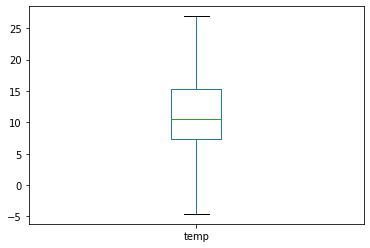

In [25]:
df_line46A_ver3['temp'].plot(kind='box')

<AxesSubplot:>

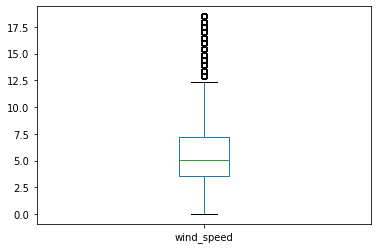

In [26]:
df_line46A_ver3['wind_speed'].plot(kind='box')

<AxesSubplot:>

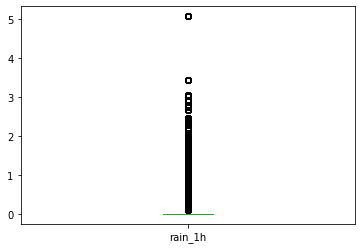

In [27]:
df_line46A_ver3['rain_1h'].plot(kind='box')

In [28]:
#Convert the weather info into binary data type
df_line46A_ver3['ISHOT'] = 0
df_line46A_ver3['ISHOT'].loc[((df_line46A_ver3['temp']>15.39))] = 1

df_line46A_ver3['ISWINDY'] = 0
df_line46A_ver3['ISWINDY'].loc[((df_line46A_ver3['wind_speed']>7.2))] = 1

df_line46A_ver3['ISRAINY'] = 0
df_line46A_ver3['ISRAINY'].loc[((df_line46A_ver3['rain_1h']>0))] = 1

<ipython-input-28-2b9521f2b533>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line46A_ver3['ISHOT'] = 0
/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [29]:
df_line46A_ver3=df_line46A_ver3.drop(columns=columns_to_convert)

In [30]:
df_line46A_ver3

,LINEID,DIRECTION,PROGRNUMBER,STOPPOINTID,PLANNED_TRIPTIME(s),WEEKDAY/WEEKEND,RUSHHOUR,MONTHOFYEAR,ACC_TRAVELTIME(s),weather_description,ISHOT,ISWINDY,ISRAINY
0,46A,1,1,807,612,0,0,1,0.0,scattered clouds,0,0,0
1,46A,1,2,808,612,0,0,1,175.0,scattered clouds,0,0,0
2,46A,1,3,809,612,0,0,1,189.0,scattered clouds,0,0,0
3,46A,1,6,812,612,0,0,1,234.0,scattered clouds,0,0,0
4,46A,1,7,813,612,0,0,1,249.0,scattered clouds,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485078,46A,2,56,799,2728,1,0,12,3126.0,light intensity drizzle,0,0,0
4485079,46A,2,55,798,2728,1,0,12,3091.0,light intensity drizzle,0,0,0
4485080,46A,2,30,768,2728,1,0,12,1456.0,light intensity drizzle,0,0,0
4485081,46A,2,39,777,2728,1,0,12,1773.0,light intensity drizzle,0,0,0


In [31]:
df_line46A_ver3['ISHOT'].value_counts()

0    3440504
1    1044579
Name: ISHOT, dtype: int64

In [32]:
# set up dummies features
df_line46A_ver3 = pd.get_dummies(df_line46A_ver3, drop_first=True)
df_line46A_ver3.dtypes

DIRECTION                                             int64
PROGRNUMBER                                           int64
STOPPOINTID                                           int64
PLANNED_TRIPTIME(s)                                   int64
WEEKDAY/WEEKEND                                       int64
RUSHHOUR                                              int64
MONTHOFYEAR                                           int64
ACC_TRAVELTIME(s)                                   float64
ISHOT                                                 int64
ISWINDY                                               int64
ISRAINY                                               int64
weather_description_drizzle                           uint8
weather_description_few clouds                        uint8
weather_description_fog                               uint8
weather_description_heavy intensity rain              uint8
weather_description_light intensity drizzle           uint8
weather_description_light intensity driz

In [36]:
#Setting up the train/test split

# y is the target
y = df_line46A_ver3["ACC_TRAVELTIME(s)"]
# X is everything else
X = df_line46A_ver3.drop(["ACC_TRAVELTIME(s)"],1)
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_line46A_ver3.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  4485083
training range (70%):	 rows 0 to 3139558
test range (30%): 	 rows 3139558 to 4485083


In [37]:
# Train RF with 10 trees
rfc = RandomForestRegressor(n_estimators=10, max_features='auto', oob_score=True, random_state=1)

In [38]:
# Fit model on full dataset
rfc.fit(X_train, y_train)

/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=1)

In [39]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'Actual ACC_TRAVELTIME(s)': y_train, 'Predicted ACC_TRAVELTIME(s)': rfc_predictions_train})
df_true_vs_rfc_predicted.head(10)

,Actual ACC_TRAVELTIME(s),Predicted ACC_TRAVELTIME(s)
2373804,3673.0,3645.287000
3838445,348.0,401.355491
3070403,2340.0,2107.924872
4418160,1543.0,1679.300000
2439837,4278.0,3979.544603
2660877,3484.0,3758.009881
3026298,464.0,560.227382
1065081,3811.0,3773.617077
3972421,329.0,358.063423
1840134,2734.0,2823.383610


In [40]:
#Evaluate the metrics 
printMetrics(y_train, rfc_predictions_train)


MAE:  190.63966893231898
RMSE:  288.7657631523584
R2:  0.9589138375656543


In [41]:
rfc_predictions_test = rfc.predict(X_test)
printMetrics(y_test, rfc_predictions_test)


MAE:  228.13718534793904
RMSE:  339.36879565874625
R2:  0.9433407150779336


## Improve the model

In [ ]:
### Remove outliers

<AxesSubplot:>

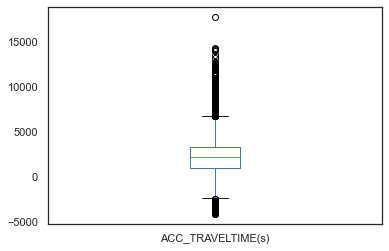

In [13]:
df_line46A_clean['ACC_TRAVELTIME(s)'].plot(kind='box')

From the box plot above we can see that huge amount of outliers exist in our dataset

In [14]:
# printing negative ACC_TRAVELTIME(s)
df_line46A_clean[['TRIPID', 'ACC_TRAVELTIME(s)']].loc[df_line46A_clean['ACC_TRAVELTIME(s)'] < 0]

,TRIPID,ACC_TRAVELTIME(s)
47882,5970740,-52.0
47883,5970740,-52.0
60591,5970740,-33.0
146655,6099083,-106.0
429160,6240781,-3.0
...,...,...
4444048,8583652,-3000.0
4444049,8583652,-3812.0
4444050,8583652,-3661.0
4444051,8583652,-2866.0


In [15]:
# printing ACC_TRAVELTIME(s) larger than 5 times the mean
df_line46A_clean[['TRIPID', 'ACC_TRAVELTIME(s)']].loc[df_line46A_clean['ACC_TRAVELTIME(s)'] > df_line46A_clean['ACC_TRAVELTIME(s)'].mean()*4]

,TRIPID,ACC_TRAVELTIME(s)
742116,6270690,9024.0
742120,6270690,9063.0
742124,6270690,9084.0
742130,6270690,9146.0
742134,6270690,9172.0
...,...,...
4447782,8583655,9050.0
4447785,8583655,9078.0
4447787,8583655,9159.0
4447789,8583655,9197.0


In [16]:
# list trip and dayofservice for all trips with outlier data (4 times above mean travel time or below 0 travel time)
outliers = df_line46A_clean.loc[(df_line46A_clean['ACC_TRAVELTIME(s)'] > df_line46A_clean['ACC_TRAVELTIME(s)'].mean()*4) | (df_line46A_clean['ACC_TRAVELTIME(s)'] < 0)].index
outliers

Int64Index([  47882,   47883,   60591,  146655,  429160,  432300,  491995,
             491996,  510077,  510151,
            ...
            4447772, 4447774, 4447778, 4447781, 4447782, 4447785, 4447787,
            4447789, 4447790, 4466475],
           dtype='int64', length=773)

In [17]:
#drop the outliers
df_line46A_clean = df_line46A_clean.drop(outliers)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PROGRNUMBER', ylabel='ACC_TRAVELTIME(s)'>

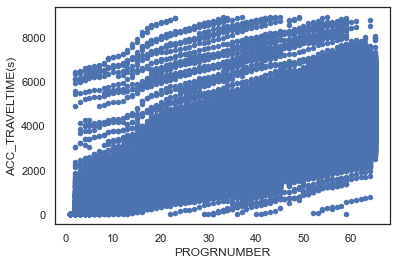

In [18]:
# plotting scatter plot for PROGRNUMBER vs TRAVELTIME for route 1
df_line46A_clean[['PROGRNUMBER', 'ACC_TRAVELTIME(s)']].plot(kind='scatter', x='PROGRNUMBER', y='ACC_TRAVELTIME(s)')

The following process refer to: https://github.com/sn-lp/Dublin-Bus-Project-Team-14/blob/main/Travel%20Time%20Models.ipynb

In [19]:
# route 46A trips which took over 10 mins to reach second stop
dfr1longstart = df_line46A_cleandfr1longstart = df_line46A_clean.loc[(df_line46A_clean['ACC_TRAVELTIME(s)'] > 600) & (df_line46A_clean['PROGRNUMBER'] == 2)].loc[(df_line46A_clean['ACC_TRAVELTIME(s)'] > 600) & (df_line46A_clean['PROGRNUMBER'] == 2)]

In [20]:
dfr1longstart

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,LINEID,DIRECTION,PLANNED_TRIPTIME(s),ACTUAL_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,...,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
28888,2018-01-03 10:00:00,5961695,2,2040,46A,2,4577,4968,10.0,2,...,993,76,12.40,250,0.00,0.00,0.0,20,Clouds,few clouds
89072,2018-01-08 08:00:00,6104113,2,2061,46A,2,3215,3215,8.0,0,...,1023,79,3.60,90,0.00,0.00,0.0,0,Clear,sky is clear
140927,2018-01-11 18:00:00,6104905,2,406,46A,1,3379,3379,18.0,3,...,1024,100,1.00,0,0.00,0.00,0.0,40,Fog,fog
298244,2018-01-22 15:00:00,6217356,2,808,46A,1,4467,5633,15.0,0,...,1012,81,6.70,260,0.00,0.00,0.0,75,Clouds,broken clouds
302398,2018-01-22 09:00:00,6212942,2,406,46A,1,2501,3262,9.0,0,...,1010,81,7.70,260,0.00,0.00,0.0,75,Clouds,broken clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297974,2018-12-14 16:00:00,8166288,2,808,46A,1,4522,5164,16.0,4,...,1014,93,7.70,150,0.00,0.65,0.0,75,Rain,light rain
4361043,2018-12-19 18:00:00,8453338,2,406,46A,1,3199,3199,18.0,2,...,993,82,2.24,205,6.26,0.00,0.0,75,Clouds,broken clouds
4436734,2018-12-26 18:00:00,8579167,2,808,46A,1,3539,3994,18.0,2,...,1026,86,4.60,230,0.00,0.00,0.0,75,Clouds,broken clouds
4439041,2018-12-26 12:00:00,8584437,2,808,46A,1,3321,4462,12.0,2,...,1026,85,4.10,220,0.00,0.00,0.0,75,Clouds,broken clouds


In [21]:
# index list for rows with over 600 travel time by stop 2
longStartIndexList = df_line46A_clean.loc[(df_line46A_clean['DAYOFSERVICE'].isin(dfr1longstart['DAYOFSERVICE'].unique())) & (df_line46A_clean['TRIPID'].isin(dfr1longstart['TRIPID'].unique()))].index.tolist()

In [22]:
# dropping trips which had over 600 travel time by stop 2
df_line46A_clean = df_line46A_clean.drop(longStartIndexList)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PROGRNUMBER', ylabel='ACC_TRAVELTIME(s)'>

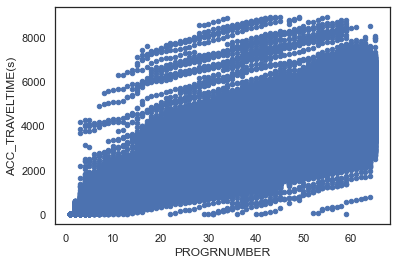

In [23]:
# plotting scatter plot for PROGRNUMBER vs TRAVELTIME for route 1
df_line46A_clean[['PROGRNUMBER', 'ACC_TRAVELTIME(s)']].plot(kind='scatter', x='PROGRNUMBER', y='ACC_TRAVELTIME(s)')

## K-Nearest Neighbours Regression

https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

In [26]:
df_line46A_ver4 = df_line46A_clean[['LINEID','DIRECTION','PROGRNUMBER','STOPPOINTID','PLANNED_TRIPTIME(s)','HOUROFDAY','DAYOFWEEK','MONTHOFYEAR','ACC_TRAVELTIME(s)','temp','wind_speed','rain_1h','wind_gust']]
df_line46A_ver4

,LINEID,DIRECTION,PROGRNUMBER,STOPPOINTID,PLANNED_TRIPTIME(s),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR,ACC_TRAVELTIME(s),temp,wind_speed,rain_1h,wind_gust
0,46A,1,1,807,612,23.0,0,1,0.0,4.39,7.20,0.0,0.00
1,46A,1,2,808,612,23.0,0,1,175.0,4.39,7.20,0.0,0.00
2,46A,1,3,809,612,23.0,0,1,189.0,4.39,7.20,0.0,0.00
3,46A,1,6,812,612,23.0,0,1,234.0,4.39,7.20,0.0,0.00
4,46A,1,7,813,612,23.0,0,1,249.0,4.39,7.20,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485078,46A,2,56,799,2728,21.0,6,12,3126.0,10.53,0.45,0.0,2.24
4485079,46A,2,55,798,2728,21.0,6,12,3091.0,10.53,0.45,0.0,2.24
4485080,46A,2,30,768,2728,21.0,6,12,1456.0,10.53,0.45,0.0,2.24
4485081,46A,2,39,777,2728,21.0,6,12,1773.0,10.53,0.45,0.0,2.24


In [27]:
# set up dummies features
df_line46A_ver4 = pd.get_dummies(df_line46A_ver4, drop_first=True)
df_line46A_ver4.dtypes

DIRECTION                int64
PROGRNUMBER              int64
STOPPOINTID              int64
PLANNED_TRIPTIME(s)      int64
HOUROFDAY              float64
DAYOFWEEK                int64
MONTHOFYEAR              int64
ACC_TRAVELTIME(s)      float64
temp                   float64
wind_speed             float64
rain_1h                float64
wind_gust              float64
dtype: object

In [28]:
#Setting up the train/test split

# y is the target
y = df_line46A_ver4["ACC_TRAVELTIME(s)"]
# X is everything else
X = df_line46A_ver4.drop(["ACC_TRAVELTIME(s)"],1)
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_line46A_ver4.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  4478616
training range (70%):	 rows 0 to 3135031
test range (30%): 	 rows 3135031 to 4478616


In [29]:
# fitting the knn model
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [30]:
# calculate the prediction
knn_predictions_train = knn.predict(X_train)

In [33]:
printMetrics(y_train, knn_predictions_train)


MAE:  177.64178612587884
RMSE:  258.8924135790256
R2:  0.9668363112382675


In [34]:
knn_predictions_test = knn.predict(X_test)

print("\nPredictions with linear regression: \n")
actual_vs_predicted_knn = pd.concat([y_test, pd.DataFrame(knn_predictions_test, columns=['Predicted'], index=y_test.index)], axis=1)
print(actual_vs_predicted_knn)


Predictions with linear regression: 

         ACC_TRAVELTIME(s)  Predicted
1827500             1587.0     1646.8
4484879              441.0      403.6
939470               665.0      742.4
4263182             2811.0     2847.4
4474782             2867.0     3049.0
...                    ...        ...
3898890             2410.0     2139.6
3497565             2609.0     2444.0
320743               484.0      539.4
2290418             3287.0     3261.0
1295460             3741.0     3862.4

[1343585 rows x 2 columns]


In [35]:
printMetrics(y_test, knn_predictions_test)


MAE:  215.22282981724274
RMSE:  313.38567474896837
R2:  0.9515170420502794
